In [ ]:
!pip install gym
!apt-get install python-opengl -y
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 1s (489 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 784 kB of 

In [ ]:
!pip install torchvision

In [ ]:
!pip install box2d-py

     |████████████████████████████████| 450kB 6.4MB/s 


In [ ]:
!pip install atari-py

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive/Reinforcement_learning/Deep_Q_learning/

deep_q_network.py  __init__.py	plots	     replay_memory.py
dqn_agent.py	   main_dqn.py	__pycache__  Train_DQN_agent.ipynb
environment.yml    models	README.md    utils.py


In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/Reinforcement_learning/Deep_Q_learning/')

In [ ]:
import torch

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


episode:  0 score:  -20.0  average score -20.0 best score -inf epsilon 0.99 steps 842
... saving checkpoint ...
... saving checkpoint ...
episode:  1 score:  -21.0  average score -20.5 best score -20.00 epsilon 0.98 steps 1808
episode:  2 score:  -20.0  average score -20.3 best score -20.00 epsilon 0.97 steps 2734
episode:  3 score:  -21.0  average score -20.5 best score -20.00 epsilon 0.96 steps 3706
episode:  4 score:  -21.0  average score -20.6 best score -20.00 epsilon 0.95 steps 4672
episode:  5 score:  -19.0  average score -20.3 best score -20.00 epsilon 0.94 steps 5620
episode:  6 score:  -21.0  average score -20.4 best score -20.00 epsilon 0.94 steps 6506
episode:  7 score:  -21.0  average score -20.5 best score -20.00 epsilon 0.93 steps 7319
episode:  8 score:  -21.0  average score -20.6 best score -20.00 epsilon 0.92 steps 8143
episode:  9 score:  -20.0  average score -20.5 best score -20.00 epsilon 0.91 steps 9065
episode:  10 score:  -19.0  average score -20.4 best score -2

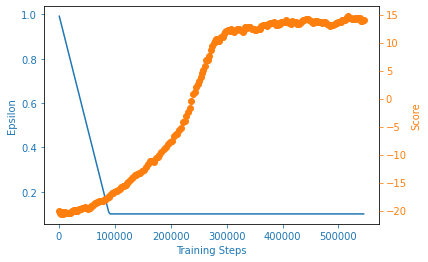

In [ ]:
import gym
import numpy as np
from dqn_agent import DQNAgent
from utils import plot_learning_curve, make_env
from gym import wrappers

if __name__ == '__main__':
    env = make_env('PongNoFrameskip-v4')
    #env = gym.make('CartPole-v1')
    best_score = -np.inf
    load_checkpoint = False
    n_games = 250



    agent = DQNAgent(gamma=0.99, epsilon=1, lr=0.0001,
                     input_dims=(env.observation_space.shape),
                     n_actions=env.action_space.n, mem_size=15000, eps_min=0.1,
                     batch_size=32, replace=1000, eps_dec=1e-5,
                     chkpt_dir='/content/gdrive/MyDrive/Reinforcement_learning/Deep_Q_learning/models/', algo='DQNAgent',
                     env_name='PongNoFrameskip-v4')
 
    if load_checkpoint:
        agent.load_models()

    fname = agent.algo + '_' + agent.env_name + '_lr' + str(agent.lr) +'_' \
            + str(n_games) + 'games'
    figure_file = '/content/gdrive/MyDrive/Reinforcement_learning/Deep_Q_learning/plots/' + fname + '.png'
    # if you want to record video of your agent playing, do a mkdir tmp && mkdir tmp/dqn-video
    # and uncomment the following 2 lines.
    #env = wrappers.Monitor(env, "tmp/dqn-video",
    #                    video_callable=lambda episode_id: True, force=True)
    n_steps = 0
    scores, eps_history, steps_array = [], [], []
    
    # Play n episodes
    for i in range(n_games):
        done = False
        # Get 1st state (observation) from gym env
        observation = env.reset()

        score = 0

        # Play episode until reaching a terminal state
        while not done:
            # Take an epsilon-greedy approach to select an action
            action = agent.choose_action(observation)
            # Get next state, reward, done flag and info from environment
            observation_, reward, done, info = env.step(action)
            # Increment score for performance monitoring
            score += reward

            if not load_checkpoint:
                # Store transition in replay buffer
                agent.store_transition(observation, action,
                                     reward, observation_, done)
                # Execute a training step for the agent
                agent.learn()

            # Set state to next state
            observation = observation_

            n_steps += 1

        # Append score, n_steps and compute avg_score at the end of an episode
        scores.append(score)
        steps_array.append(n_steps)
        avg_score = np.mean(scores[-100:])

        print('episode: ', i,'score: ', score,
             ' average score %.1f' % avg_score, 'best score %.2f' % best_score,
            'epsilon %.2f' % agent.epsilon, 'steps', n_steps)

        # Save main and target models if avg_score improved
        if avg_score > best_score:
            if not load_checkpoint:
                agent.save_models()
            best_score = avg_score

        eps_history.append(agent.epsilon)

    plot_learning_curve(steps_array, scores, eps_history, figure_file)